In [125]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [44]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv("./Data/Jadarat_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [5]:
df.shape

(1470, 18)

In [6]:
df.head()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2 Years,both
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,NaN,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0 Years,both


In [11]:
df.tail()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1465,مهندس تقنية معلومات,19/06/1444,['دراسة احتياجات العميل من الأجهزة الحاسوبية و...,[' متابعة وتقييم عملية جمع وتحليل المعطيات و...,مطعم الاوراق الخضر لتقديم الوجبات,15-1698448,خاص,صغيرة فئة ب,المطاعم مع الخدمة,NaN,الرياض,AR RIYADH...,"['Salary', '5500.0']",دوام كامل,0 / 1,20202026400353,0 Years,both
1466,سكرتير,19/06/1444,['دعم المدير أو الإدارة من خلال كتابة الوثائق ...,[' تدوين الملاحظات، التي يتم إملاؤها، بطريقة...,شركة ملتقى التجار لحاضنات و مسرعات الأعمال,9-2013930,خاص,صغيرة فئة ب,أنشطة حاضنات ومسرعات الأعمال,"['Skill data', 'فن التواصل', 'محترف', 'Languag...",مكة المكرمة,JEDDAH...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026399849,2 Years,both
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both
1468,مشغل آلة تشطيب رخام,18/06/1444,['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...,[' تسوية الرخام بواسطة أقراص الألماس الحديدي...,مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...,15-1971895,خاص,صغيرة فئة أ,NaN,"['Skill data', 'متقن للعمل وشغوف ويرغب بالتطور...",المنطقة الشرقية,AL KHUBAR...,"['Salary', '4000.0', 'Benefits', 'اجازة سنوية ...",دوام كامل,0 / 3,20202026398972,0 Years,M
1469,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1470 non-null   object
 1   job_date      1470 non-null   object
 2   job_desc      1470 non-null   object
 3   job_tasks     1470 non-null   object
 4   comp_name     1470 non-null   object
 5   comp_no       1470 non-null   object
 6   comp_type     1470 non-null   object
 7   comp_size     1456 non-null   object
 8   eco_activity  1380 non-null   object
 9   qualif        780 non-null    object
 10  region        1470 non-null   object
 11  city          1470 non-null   object
 12  benefits      1470 non-null   object
 13  contract      1470 non-null   object
 14  positions     1470 non-null   object
 15  job_post_id   1470 non-null   int64 
 16  exper         1470 non-null   object
 17  gender        1470 non-null   object
dtypes: int64(1), object(17)
memory usage: 206.8+ KB


In [8]:
df.describe()

,job_post_id
count,1.470000e+03
mean,2.020203e+13
std,5.863941e+04
min,2.020203e+13
25%,2.020203e+13
50%,2.020203e+13
75%,2.020203e+13
max,2.020203e+13


In [10]:
df.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender'],
      dtype='object')

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [58]:
# in the kaggle page mentioned data source (Jadarat).

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [ ]:
# For the given tasks and datasets, I will use the provided dataset in kaggle

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [59]:
# It is consistence 

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [45]:
# Remove unnecessary col for the purpose of our analysis
df.drop(['job_date', 'job_desc', 'job_tasks', 'comp_name', 'comp_no', 'comp_size', 'city', 'eco_activity', 'qualif','city', 'positions'], axis=1, inplace=True)


In [46]:
df.head()

,job_title,comp_type,region,benefits,contract,job_post_id,exper,gender
0,محاسب,خاص,الرياض,"['Salary', '5000.0']",دوام كامل,20202026350419,0 Years,both
1,بائع,خاص,المنطقة الشرقية,"['Salary', '5000.0']",دوام كامل,20202026350389,0 Years,both
2,أخصائي عمليات موارد بشرية,خاص,الرياض,"['Salary', '4000.0']",دوام كامل,20202026350347,2 Years,both
3,ميكانيكي سيارات,خاص,المنطقة الشرقية,"['Salary', '5000.0']",دوام كامل,20202026350219,0 Years,M
4,محاسب,خاص,الرياض,"['Salary', '5000.0']",دوام كامل,20202026350043,0 Years,both


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [47]:
df.duplicated().sum()

89

In [48]:
# go to delete duplicates columns
df[df.duplicated()]

,job_title,comp_type,region,benefits,contract,job_post_id,exper,gender
137,محلل نظم المعلومات,خاص,مكة المكرمة,"['Salary', '4000.0']",دوام كامل,20202026276207,2 Years,both
139,نادل,خاص,الرياض,"['Salary', '4000.0']",دوام كامل,20202026275555,0 Years,F
281,سائق سيارة,خاص,الرياض,"['Salary', '4500.0']",دوام كامل,20202026274543,2 Years,both
289,محاسب,خاص,مكة المكرمة,"['Salary', '6000.0']",دوام كامل,20202026271430,2 Years,both
607,مساعد طب بيطري,خاص,الرياض,"['Salary', '5500.0']",دوام كامل,20202026310906,0 Years,both
...,...,...,...,...,...,...,...,...
1389,كاتب شحن,خاص,عسير,"['Salary', '4000.0', 'Benefits', '1000 ريال بد...",دوام كامل,20202026357229,0 Years,M
1457,محاسب,خاص,الرياض,"['Salary', '5000.0']",دوام كامل,20202026402637,4 Years,both
1458,أخصائي خدمة عملاء,خاص,الرياض,"['Salary', '4000.0']",دوام كامل,20202026402465,4 Years,both
1467,صيدلي,خاص,الرياض,"['Salary', '7000.0']",دوام كامل,20202026399061,0 Years,both


In [49]:
df.drop_duplicates(inplace = True)

In [50]:
df.duplicated().sum()

0

In [51]:
df.shape

(1381, 8)

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [52]:
#Display number missing values per column
df.isnull().sum().sort_values(ascending = False)

job_title      0
comp_type      0
region         0
benefits       0
contract       0
job_post_id    0
exper          0
gender         0
dtype: int64

In [68]:
# go to clean them 
# Already Clean :)

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [53]:
# check columns types 
df.dtypes

job_title      object
comp_type      object
region         object
benefits       object
contract       object
job_post_id     int64
exper          object
gender         object
dtype: object

In [54]:
# 1- Convert the exper col to int
df['exper'] = df['exper'].map(lambda x: int(x.split()[0]))

In [55]:
df.head()

,job_title,comp_type,region,benefits,contract,job_post_id,exper,gender
0,محاسب,خاص,الرياض,"['Salary', '5000.0']",دوام كامل,20202026350419,0,both
1,بائع,خاص,المنطقة الشرقية,"['Salary', '5000.0']",دوام كامل,20202026350389,0,both
2,أخصائي عمليات موارد بشرية,خاص,الرياض,"['Salary', '4000.0']",دوام كامل,20202026350347,2,both
3,ميكانيكي سيارات,خاص,المنطقة الشرقية,"['Salary', '5000.0']",دوام كامل,20202026350219,0,M
4,محاسب,خاص,الرياض,"['Salary', '5000.0']",دوام كامل,20202026350043,0,both


In [56]:
df.dtypes

job_title      object
comp_type      object
region         object
benefits       object
contract       object
job_post_id     int64
exper           int64
gender         object
dtype: object

In [68]:
# Used to make sure the benefits col has the salary always on the second index
df.sample(15)

,job_title,comp_type,region,benefits,contract,job_post_id,exper,gender
751,فني كهروميكانيك,خاص,مكة المكرمة,"['Salary', '4000.0']",دوام كامل,20202026338722,0,both
905,موظف استقبال,خاص,مكة المكرمة,"['Salary', '4000.0']",دوام كامل,20202026375986,0,both
571,أخصائي تدريب وتطوير موارد بشرية,خاص,الرياض,"['Salary', '7000.0']",دوام كامل,20202026312239,0,both
416,مهندس سلامة وصحة مهنية,خاص,الرياض,"['Salary', '7000.0']",دوام كامل,20202026239172,2,M
1123,محضر مختبر علوم,خاص,الرياض,"['Salary', '5000.0']",دوام كامل,20202026390983,0,both
620,أخصائي أمن بيانات,خاص,المنطقة الشرقية,"['Salary', '7000.0']",دوام كامل,20202026310428,0,both
126,فني انتاج مشتقات نفطية,خاص,المدينة المنورة,"['Salary', '5000.0', 'Benefits', 'بدل مواصلات ...",دوام كامل,20202026275382,2,M
748,مساعد إداري,خاص,الرياض,"['Salary', '4000.0']",عمل عن بعد,20202026339000,0,both
990,موظف استقبال,خاص,الرياض,"['Salary', '5000.0']",دوام كامل,20202026356124,2,F
358,سائق شاحنة صغيرة,خاص,الرياض,"['Salary', '4800.0']",دوام كامل,20202026242682,0,M


In [93]:
# Create a new col called: salary
df['salary'] = df['benefits'].apply(lambda x: float(x.split(",")[1].strip().replace("'", "").replace("]", "")))

In [94]:
df.head()

,job_title,comp_type,region,benefits,contract,job_post_id,exper,gender,salary
0,محاسب,خاص,الرياض,"['Salary', '5000.0']",دوام كامل,20202026350419,0,both,5000.0
1,بائع,خاص,المنطقة الشرقية,"['Salary', '5000.0']",دوام كامل,20202026350389,0,both,5000.0
2,أخصائي عمليات موارد بشرية,خاص,الرياض,"['Salary', '4000.0']",دوام كامل,20202026350347,2,both,4000.0
3,ميكانيكي سيارات,خاص,المنطقة الشرقية,"['Salary', '5000.0']",دوام كامل,20202026350219,0,M,5000.0
4,محاسب,خاص,الرياض,"['Salary', '5000.0']",دوام كامل,20202026350043,0,both,5000.0


In [95]:
df.dtypes

job_title       object
comp_type       object
region          object
benefits        object
contract        object
job_post_id      int64
exper            int64
gender          object
salary         float64
dtype: object

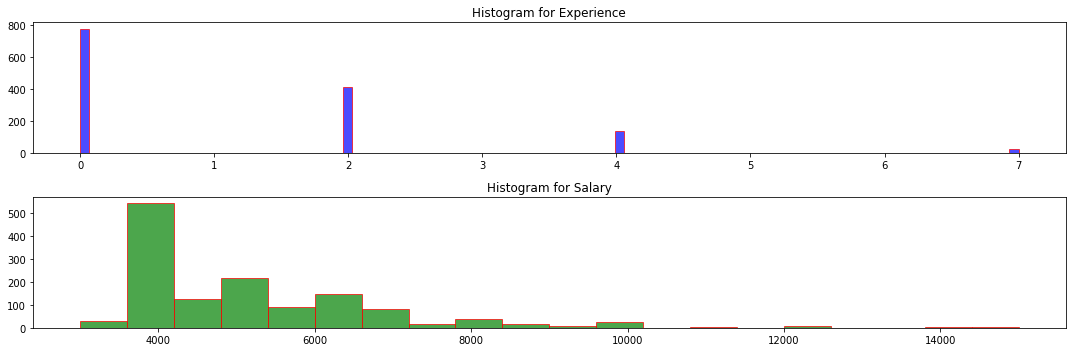

In [121]:
# check outliers 

# Create a figure and an array of axes with a subplot for each histogram
fig, axes = plt.subplots(2, 1, figsize=(15, 5))

# Plot a histogram for each dataset using plt.hist
axes[0].hist(df['exper'],edgecolor = 'red', bins=100, alpha=0.7, color='blue')
axes[0].set_title('Histogram for Experience')

axes[1].hist(df['salary'], edgecolor = 'red', bins=20, alpha=0.7, color='green')
axes[1].set_title('Histogram for Salary')

# Display the plots
plt.tight_layout()
plt.show()

In [113]:
# Check the shape of the outliers
df[df['exper'] > 7].shape

(17, 9)

In [114]:
# Drop the outliers
df = df.drop(df[df['exper'] > 7].index)

In [115]:
# Ensuer the outliers are removed
df[df['exper'] > 7].shape

(0, 9)

In [117]:
# Check the shape of the outliers
df[df['salary'] > 15000].shape

(3, 9)

In [118]:
# Drop the outliers
df = df.drop(df[df['salary'] > 15000].index)

In [119]:
# Ensuer the outliers are removed
df[df['salary'] > 15000].shape

(0, 9)

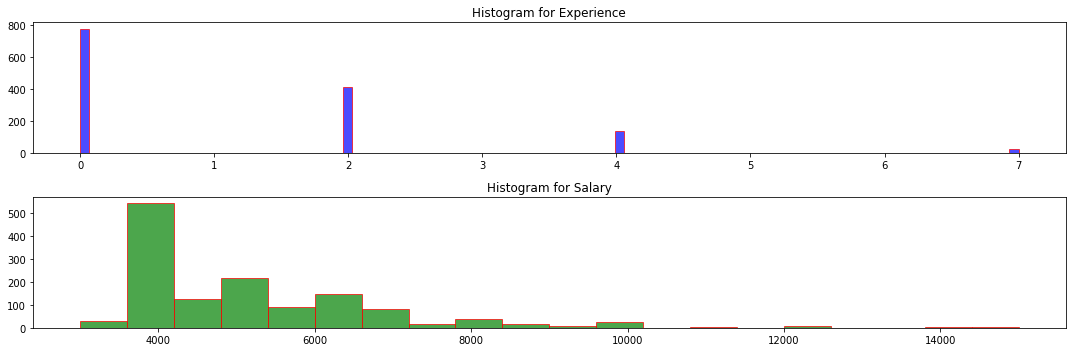

In [120]:
# Ensuer the outliers are removed

# Create a figure and an array of axes with a subplot for each histogram
fig, axes = plt.subplots(2, 1, figsize=(15, 5))

# Plot a histogram for each dataset using plt.hist
axes[0].hist(df['exper'],edgecolor = 'red', bins=100, alpha=0.7, color='blue')
axes[0].set_title('Histogram for Experience')

axes[1].hist(df['salary'], edgecolor = 'red', bins=20, alpha=0.7, color='green')
axes[1].set_title('Histogram for Salary')

# Display the plots
plt.tight_layout()
plt.show()

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [23]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [24]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [25]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [80]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [132]:
# Calculate the total number of job postings for each region
region_counts = df['region'].value_counts()

# Identify the top 3 regions
top_3_regions = region_counts.nlargest(3)

# Calculate the "Other" category by summing all regions not in the top 3
other_sum = region_counts[~region_counts.index.isin(top_3_regions.index)].sum()

# Combine the top 3 regions with the "Other" category using pd.concat
combined_data = pd.concat([top_3_regions, pd.Series({'Other': other_sum})])

# Calculate the proportion for the pie chart
region_proportions = combined_data / combined_data.sum()

# Create the Plotly pie chart
fig = px.pie(
    names=region_proportions.index,
    values=region_proportions.values,
    title='Proportion of Job Postings Attributed to Each Region Within the Kingdom'
)

# Update the layout for better presentation
fig.update_traces(textinfo='percent+label')
fig.update_layout(template="plotly_white")

# Show the interactive plot
fig.show()


C:\Users\zalja\anaconda3\lib\site-packages\plotly\express\_core.py:1988: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



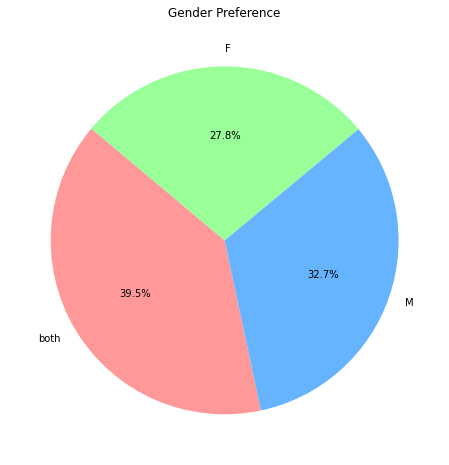

In [134]:
# Count the number of job postings for each gender preference
gender_counts = df['gender'].value_counts()

# Define labels and values for the pie chart
labels = gender_counts.index
sizes = gender_counts.values

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])

plt.title('Gender Preference')
plt.show()

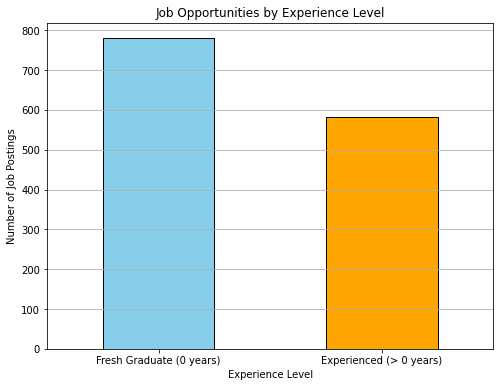

In [138]:
# Count the number of job postings for fresh graduates and experienced individuals
fresh_graduate_count = (df['exper'] == 0).sum()
experienced_count = (df['exper'] > 0).sum()

# Create a DataFrame or Series to hold these counts
experience_distribution = pd.Series({
    'Fresh Graduate (0 years)': fresh_graduate_count,
    'Experienced (> 0 years)': experienced_count
})

# Plotting the distribution
plt.figure(figsize=(8, 6))
experience_distribution.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')

plt.xlabel('Experience Level')
plt.ylabel('Number of Job Postings')
plt.title('Job Opportunities by Experience Level')

plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

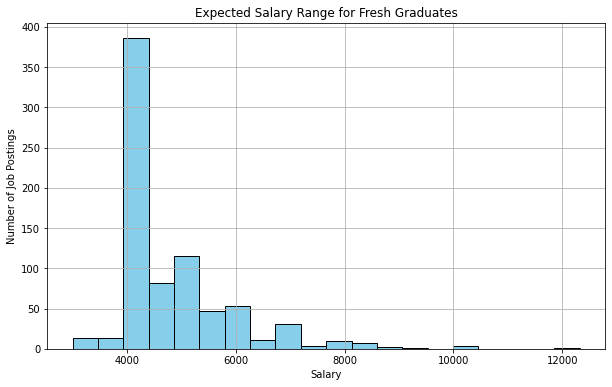

In [136]:
# Filter the DataFrame for fresh graduate job postings
fresh_grad_jobs = df[df['exper'] == 0]

# Extract the salary data for these postings
salaries = fresh_grad_jobs['salary']

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(salaries, bins=20, edgecolor='black', color='skyblue')

plt.xlabel('Salary')
plt.ylabel('Number of Job Postings')
plt.title('Expected Salary Range for Fresh Graduates')

plt.grid()
plt.show()

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.